In [115]:
import random
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(5)

In [87]:
def f(x):
    return x ** 3 - 3 * x - 2 * np.exp(-x)

def f1(point):
    x, y = point
    return x ** 3 + y ** 3 - 8 * x * y

def f2(point):
    x, y = point
    return x * np.log(y) - y * np.log(x)

In [88]:
def _der(f, x, delta=1e-6):
    return (f(x + delta) - f(x)) / delta

def _der_n(f, x, i, delta=1e-6):
    delta_v = np.zeros(len(x))
    delta_v[i] = delta
    return (f(x + delta_v) - f(x)) / delta

def der(f, x, delta=1e-6):
    if isinstance(x, (int, float, complex)):
        return _der(f, x, delta)
    else:
        return _der_n(f, x, delta)

def jacobian(functions, x):
    n = len(functions)
    m = len(x)

    jacobian_ = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            jacobian_[i, j] = der(functions[i], x, j)

    return jacobian_

In [89]:
def find_interval(f, x1=-10, x2=10, delta=1, step=10, max_iterations=100):
    iterations = 0

    while iterations < max_iterations:
        if f(x1) * f(x2) < 0:
            break

        x1 -= step
        x2 += step

        iterations += 1

    if f(x1) * f(x2) > 0:
        raise ValueError("Root interval was not found within max_iterations.")

    while iterations < max_iterations:
        x = (x1 + x2) / 2

        if f(x1) * f(x) < 0:
            x2 = x
        else:
            x1 = x


        if abs(x1 - x2) < delta:
            return x1, x2

        iterations += 1

    return x1, x2

In [102]:
def _newton_method_1(f, eps=1e-6, max_iterations=100):
    iterations = 0
    func_values = []
    x1, x2 = find_interval(f)
    x_prev = random.uniform(x1, x2)

    while iterations < max_iterations:
        x = x_prev - f(x_prev) / der(f, x_prev)
        func_values.append(f(x))

        if abs(f(x)) < eps:
            return func_values, x_prev

        x_prev = x
        iterations += 1

    return func_values, x_prev

def _newton_method_n(functions, n, eps=1e-6, max_iterations=100):

    iterations = 0
    func_values = []
    x_prev = np.random.default_rng(seed=42).uniform(low=0, high=10, size=n)

    while iterations < max_iterations:
        funcs = np.array([func(x_prev) for func in functions], dtype=np.float64)
        func_values.append(funcs)
        x = x_prev - np.linalg.inv(jacobian(functions, x_prev)) @ funcs
        if np.linalg.norm(x - x_prev) < eps:
            return func_values, x_prev

        x_prev = x
        iterations += 1

    return func_values, x_prev

def newton_method(functions, n=1, eps=1e-6, max_iterations=100):
    if callable(functions):
        return _newton_method_1(functions, eps, max_iterations)
    else:
        return _newton_method_n(functions, n, eps, max_iterations)


In [100]:
def secant_method(f, eps=1e-6, max_iterations=100):
    iterations = 0
    func_values = []
    x1, x2 = find_interval(f)

    while iterations < max_iterations:
        der = (f(x2) - f(x1)) / (x2 - x1)
        x = x2 - f(x2) / der
        func_values.append(f(x))

        if abs(f(x)) < eps:
            return func_values, x

        x2, x1 = x, x2
        iterations += 1

    return func_values, x2

Приближенное значение корня 1.7854630608417366
Погрешность значения функции 1.1081435035420473e-05



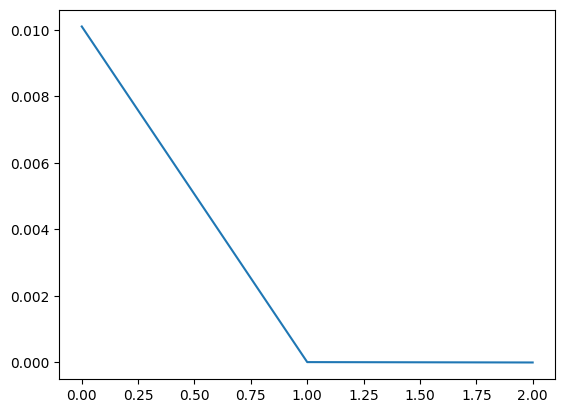

In [121]:
values, x = newton_method(f)
print(f"Приближенное значение корня {x}")
print(f"Погрешность значения функции {f(x)}")
fig, ax = plt.subplots()
ax.plot(values)
print()

Приближенное значение корня 1.785461454597921
Погрешность значения функции -1.4617385080128997e-10



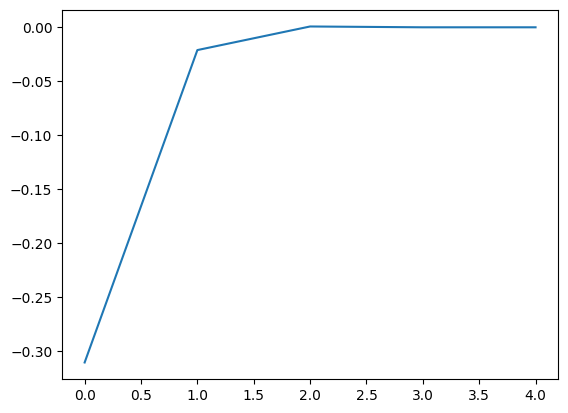

In [120]:
values, x = secant_method(f)
print(f"Приближенное значение корня {x}")
print(f"Погрешность значения функции {f(x)}")
fig, ax = plt.subplots()
ax.plot(values)
print()

Приближенное значение решения системы [4. 4.]
Погрешности значений функций [7.94670995674096e-11, -2.318145675417327e-13]



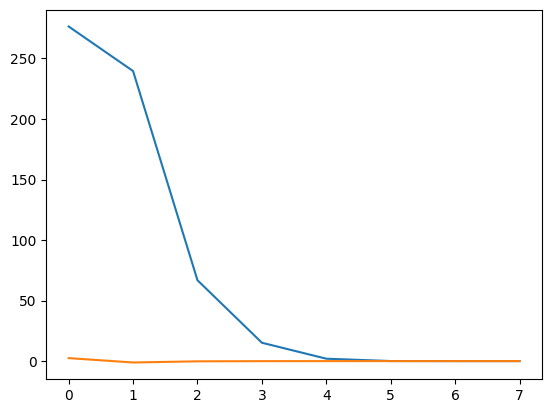

In [119]:
values, x = newton_method(np.array([f1, f2]), 2)
v0 = [v[0] for v in values]
v1 = [v[1] for v in values]
print(f"Приближенное значение решения системы {x}")
print(f"Погрешности значений функций {[f(x) for f in [f1, f2]]}")
fig, ax = plt.subplots()
ax.plot(v0)
ax.plot(v1)
print()